# - Clustering Negara -

Clustering the Countries by using K-Means for HELP International

Objective:

Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

Tentang Organisasi:

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.


Permasalahan:

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.



Penjelasan kolom fitur:

    Negara : Nama negara
    Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
    Ekspor : Ekspor barang dan jasa perkapita
    Kesehatan: Total pengeluaran kesehatan perkapita
    Impor: Impor barang dan jasa perkapita
    Pendapatan: Penghasilan bersih perorang
    Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP
    Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
    Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
    GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi.


In [1]:
# importing library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
# importing data
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# baca dengan pandas
df = pd.read_csv('Data_Negara_HELP.csv')

# Lihat isi data
df.head()


Saving Data_Negara_HELP.csv to Data_Negara_HELP.csv


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# looking for missing value
df.isna().sum()

,0
Negara,0
Kematian_anak,0
Ekspor,0
Kesehatan,0
Impor,0
Pendapatan,0
Inflasi,0
Harapan_hidup,0
Jumlah_fertiliti,0
GDPperkapita,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Pair Plot


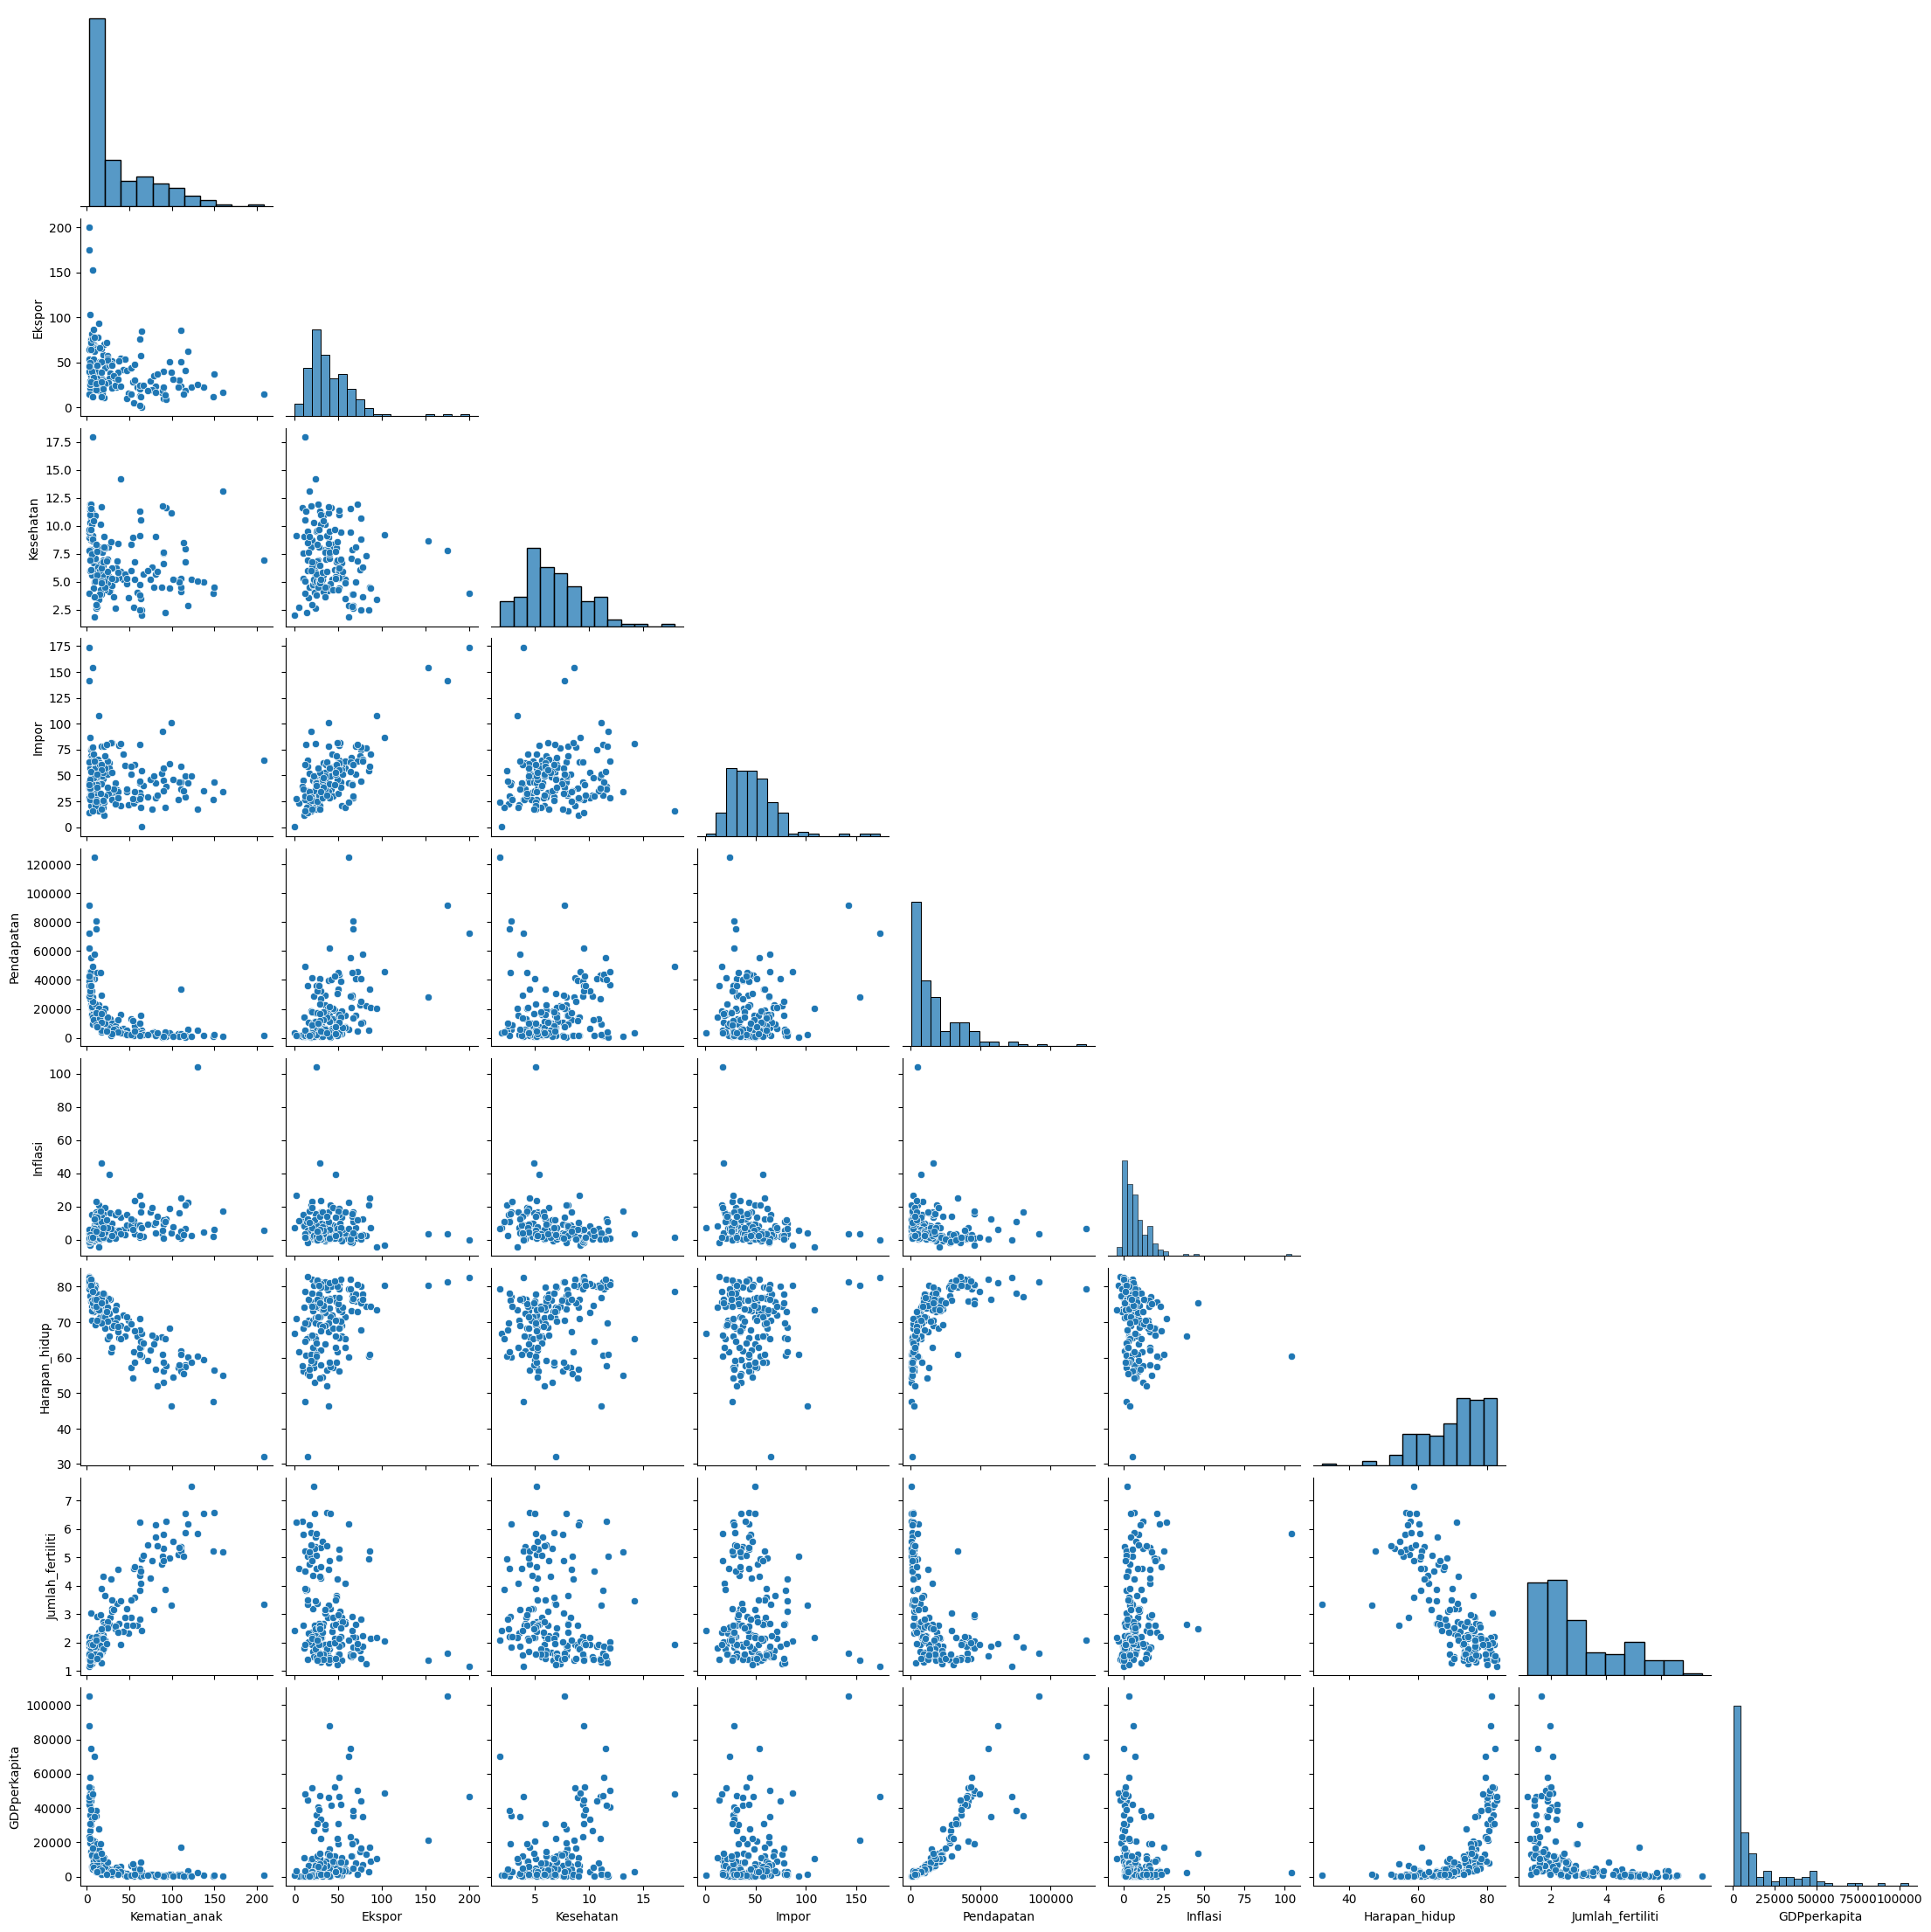

<Figure size 640x480 with 0 Axes>

In [7]:
# Bivariate visualisation
print('Pair Plot')
sns.pairplot(data=df, kind='scatter', corner=True)
plt.show()

#simpan plot
plt.savefig('pairplot.jpeg', dpi=120)


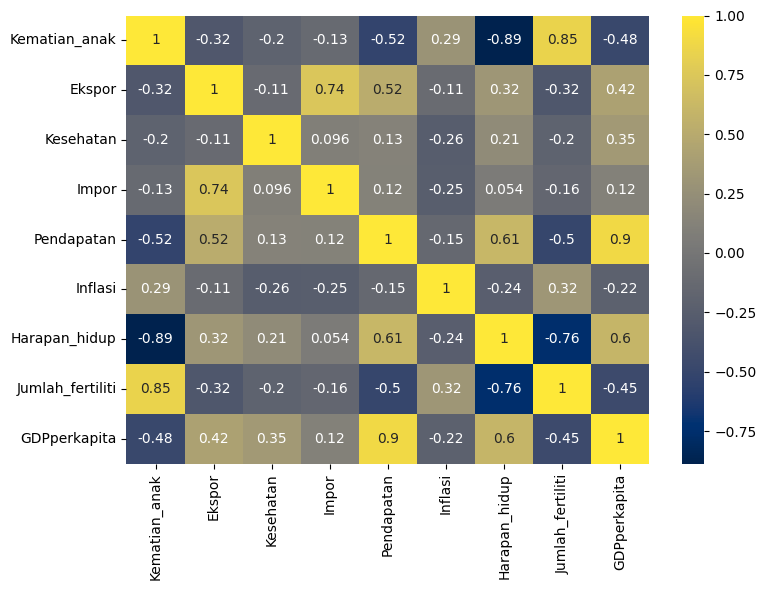

In [16]:
# Korelasi
# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2g', cmap="cividis")
plt.tight_layout()
plt.show()

In [17]:
#univariate
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


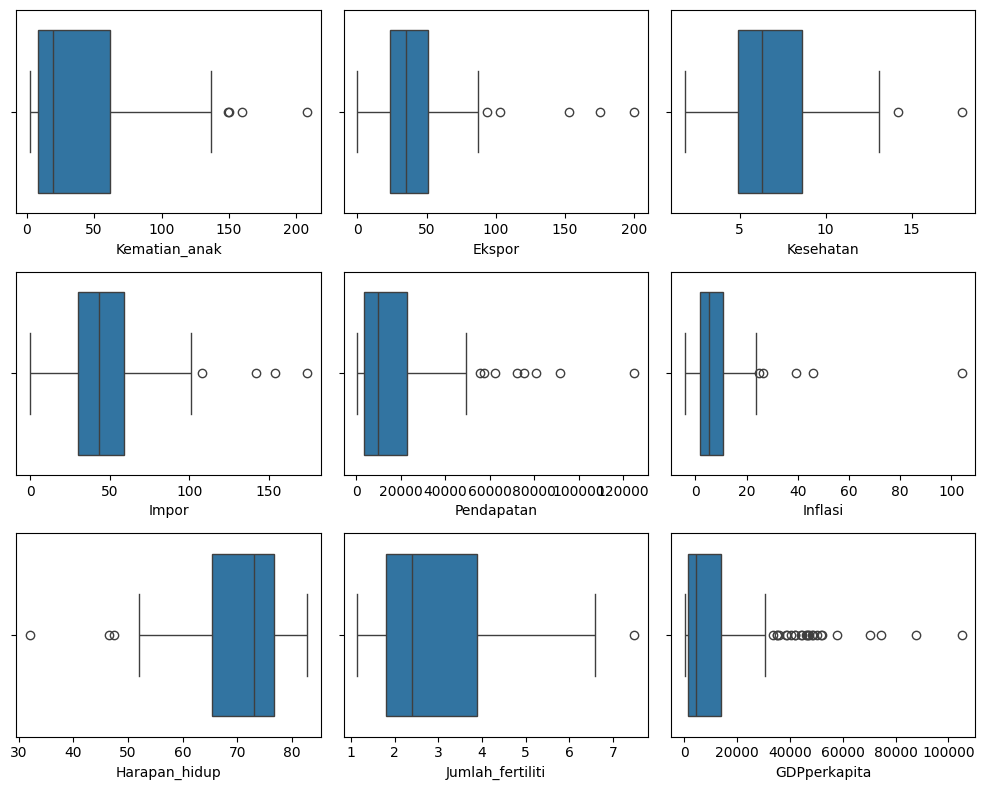

In [19]:
# Univariate and
# looking for outliers using looping
plt.figure(figsize=(10,8))

for i in enumerate(df.describe()):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(x = df[i[1]])

plt.tight_layout()
plt.show()
#outliers terlalu banyak, do not drop

In [36]:
# looking for multikolinieritas
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.iloc[:, 1: 10]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

display(vif_data)
#vif tinggi except kematian anak dan inflasi --> use pca

,feature,VIF
0,Kematian_anak,8.084814
1,Ekspor,16.084236
2,Kesehatan,12.421525
3,Impor,17.280234
4,Pendapatan,13.414051
5,Inflasi,1.985961
6,Harapan_hidup,21.916807
7,Jumlah_fertiliti,17.673828
8,GDPperkapita,10.298641


In [37]:
# Handling outliers
sc = StandardScaler()
dfstd = sc.fit_transform(X.astype(float))
dfstd = pd.DataFrame(dfstd, columns=X.columns)
display(dfstd)

normal = normalize(dfstd)
normal = pd.DataFrame(normal, columns=X.columns)
display(normal)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,0.399908,-0.352455,0.086416,-0.025531,-0.250264,0.048717,-0.501333,0.589205,-0.210300
1,-0.365985,-0.325723,-0.065881,0.048103,-0.254902,-0.212106,0.439948,-0.583983,-0.329773
2,-0.163969,-0.059571,-0.580597,-0.385691,-0.132725,0.474344,0.402916,-0.023081,-0.279685
3,0.514838,0.198822,-0.371311,-0.042390,-0.150016,0.355665,-0.302377,0.545696,-0.132380
4,-0.491459,0.113510,-0.202688,0.351527,0.071873,-0.425130,0.497552,-0.382880,-0.029543
...,...,...,...,...,...,...,...,...,...
162,-0.144995,0.129143,-0.367478,0.154715,-0.474702,-0.314817,-0.547742,0.235095,-0.351539
163,-0.131920,-0.115596,-0.174351,-0.304047,-0.008404,0.906219,0.136893,-0.079345,0.007347
164,-0.169087,0.513329,0.004032,0.626742,-0.299015,0.186080,0.130322,-0.300287,-0.289637
165,0.191119,-0.173244,-0.254562,-0.220551,-0.280838,0.639702,-0.146885,0.486279,-0.271816


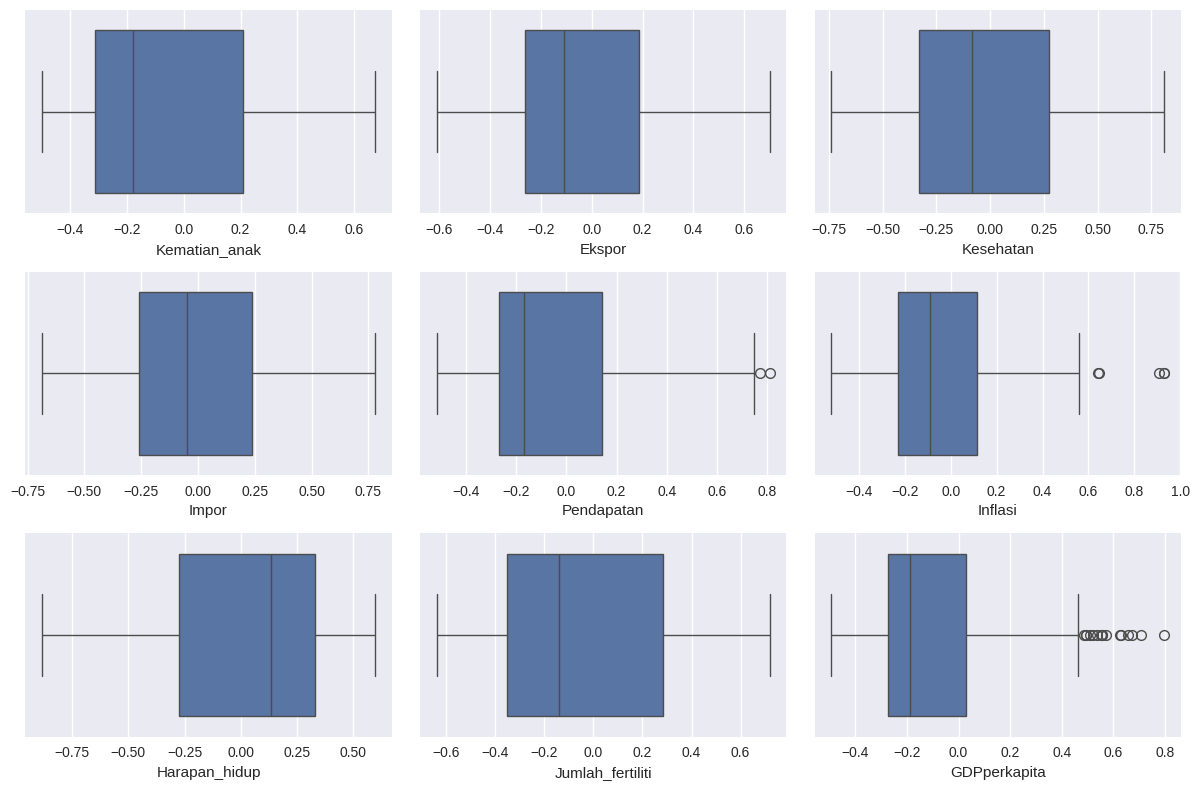

In [69]:
# Handling outliers 2
plt.figure(figsize=(12,8))

for i in enumerate(normal.describe()):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(x = normal[i[1]])

plt.tight_layout()
plt.show()
#masih ada 3 x contains outlier
#tetap dimasukkan karna data sekunder dan # outliernya banyak

**PCA**

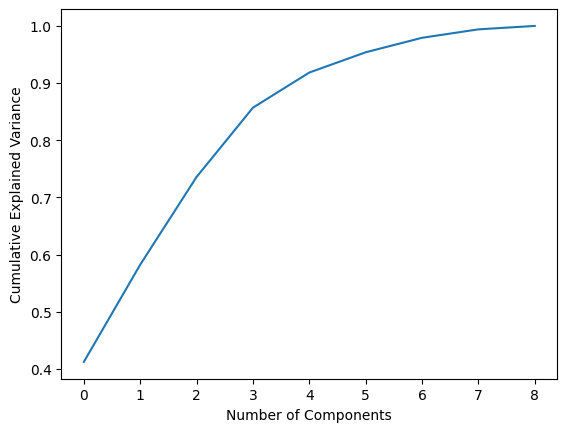

In [49]:
# PCA for handling multikolinieritas
pca = PCA()
pca.fit(normal)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


#2 components sudah mewakili 75% dari data

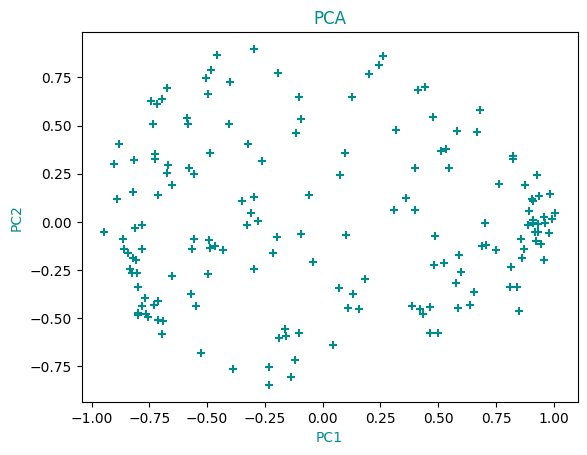

In [47]:
# PCA
n_comp=2
pca_final = PCA(n_components=n_comp)
pca_final.fit(normal)
pca_Data = pca_final.fit_transform(normal)

# PCA plot style 1
plt.style.use('default')
plt.scatter(pca_Data[:,0], pca_Data[:,1], marker='+', c='darkcyan') #silahkan ganti marker dan c
plt.xlabel("PC1", c='darkcyan')
plt.ylabel("PC2", c='darkcyan')
plt.title("PCA", c='darkcyan')
plt.show()

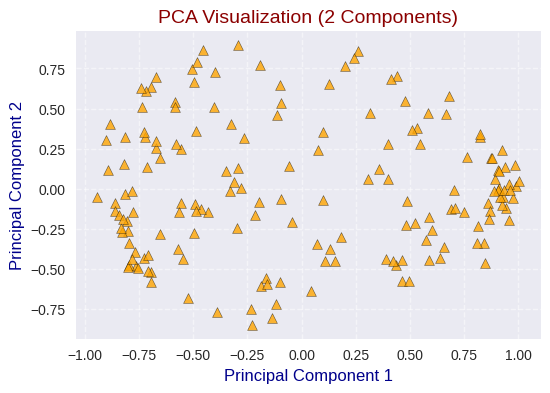

In [67]:
# PCA plot style 2
plt.figure(figsize=(6,4))
plt.scatter(pca_Data[:,0], pca_Data[:,1], marker='^', c='orange', s=50, alpha=0.8, edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Principal Component 1", fontsize=12, color='darkblue')
plt.ylabel("Principal Component 2", fontsize=12, color='darkblue')
plt.title("PCA Visualization (2 Components)", fontsize=14, color='darkred')
plt.show()


**Clustering**

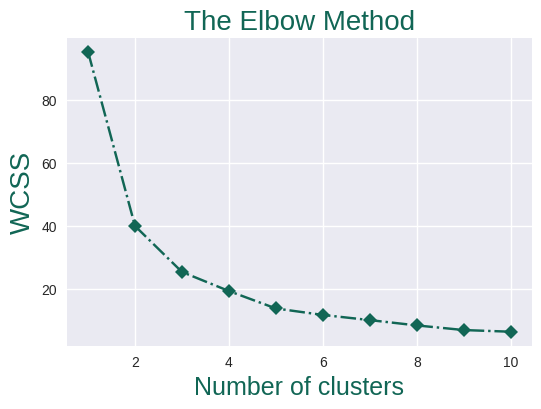

In [72]:
# Elbow Method to decide the number of cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 40) #random_state -> hasil konsisten
    kmeans.fit(pca_Data)
    wcss.append(kmeans.inertia_)

fig = plt.figure(figsize=(6, 4))
plt.style.use('seaborn-v0_8')
plt.plot(range(1,11), wcss, c='#116655', marker='D', linestyle='-.')
plt.title('The Elbow Method', c='#116655', size=20)
plt.xlabel('Number of clusters', c='#116655', size=18)
plt.ylabel('WCSS', c='#116655', size=20)
plt.show()
# 3 cluster chosen

In [101]:
# k-means with 3 clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pca_Data)
kmeans.labels_

array([1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1,
       1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2,
       1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1], dtype=int32)

In [102]:
#menggabungkan tabel PCA dan cluster
pca_df = pd.DataFrame(pca_Data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_
pca_df.head()


,PC1,PC2,Cluster
0,0.931544,-0.052894,1
1,-0.431395,-0.144087,0
2,0.133125,-0.373318,2
3,0.876380,0.190816,1
4,-0.725008,0.325375,0


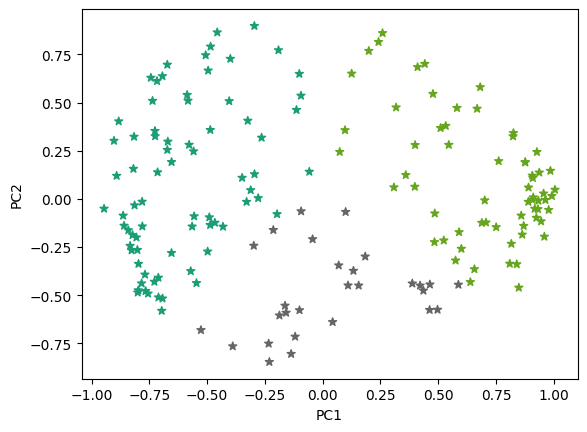

In [103]:
# Grafik hasil cluster
plt.style.use('default')
plt.scatter(pca_Data[:,0], pca_Data[:,1],
            c = label.cluster,
            marker='*', cmap = 'Dark2')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
#legend tidak keluar, cant decide

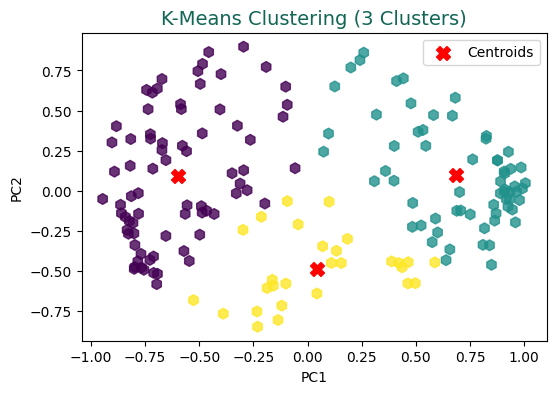

In [105]:
plt.figure(figsize=(6,4))
plt.scatter(pca_df['PC1'], pca_df['PC2'],
            c=pca_df['Cluster'], cmap='viridis', marker='h', s=60, alpha=0.8)
plt.title('K-Means Clustering (3 Clusters)', fontsize=14, color='#116655')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Menandai posisi centroid
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centroids')

plt.legend()
plt.show()


In [87]:
# create new data frame which has cluster columns
cc = df.copy()
cc['cluster']=kmeans.labels_
cc.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [88]:
# create table which has pca component
cc2 = pd.concat([cc, pd.DataFrame(pca_Data)], axis=1)
cc2.columns.values[-2:]=['component 1', 'component 2']
cc2.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster,component 1,component 2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0.931544,-0.052894
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,-0.431395,-0.144087
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0.133125,-0.373318
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0.876380,0.190816
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,-0.725008,0.325375


In [89]:
# Karakteristik each cluster based on mean
# calculating mean values for each cluster
ccgroup = cc2.select_dtypes(include='number').groupby(cc2['cluster']).mean()
display(ccgroup)


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster,component 1,component 2
cluster,,,,,,,,,,,,
0,9.098667,54.432000,7.829867,54.314667,29980.800000,3.691600,77.333333,1.834267,24869.066667,0.0,-0.600498,0.094950
1,77.898438,32.151719,6.212656,46.750000,4213.640625,10.767500,61.465625,4.517500,2056.343750,1.0,0.685633,0.101249
2,25.828571,25.896036,5.477500,27.323782,12318.928571,11.913429,73.178571,2.343571,6008.142857,2.0,0.041314,-0.485757


In [90]:
# Karakteristik each cluster based on median
# calculating median values for each cluster
ccgroup = cc2.select_dtypes(include='number').groupby(cc2['cluster']).median()
display(ccgroup)
#rank cluster for each columns still the same, mean can be used for deciding the charatecristics

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster,component 1,component 2
cluster,,,,,,,,,,,,
0,7.00,50.20,7.77,51.10,25200.0,2.01,77.1,1.790,16600.0,0.0,-0.672361,0.045458
1,73.30,28.90,5.34,43.40,2590.0,6.81,61.7,4.640,1185.0,1.0,0.756332,0.037810
2,20.05,26.05,5.14,26.05,9910.0,9.11,74.3,2.355,4670.0,2.0,-0.000320,-0.463007


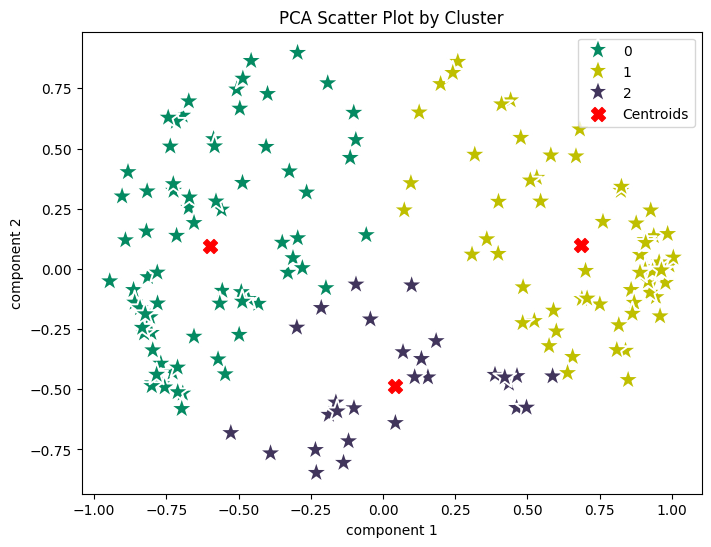

In [95]:
# plot data using pca component
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=cc2['component 1'],
    y=cc2['component 2'],
    hue=cc2['cluster'],
    marker='*',
    s=300,
    palette=['#048a62', 'y', '#41355c']
)
plt.title('PCA Scatter Plot by Cluster')

# Menandai posisi centroid
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centroids')

plt.legend()
plt.show()


In [96]:
# list negara di cluster 0
cluster0 = cc2[(cc2['cluster']==0)]
cluster0 = cluster0.reset_index(drop=True)
cluster0.Negara

,Negara
0,Albania
1,Antigua and Barbuda
2,Australia
3,Austria
4,Bahamas
...,...
70,Ukraine
71,United Arab Emirates
72,United Kingdom
73,United States


In [97]:
# list negara di cluster 1
cluster1 = cc2[(cc2['cluster']==1)]
cluster1 = cluster1.reset_index(drop=True)
cluster1.Negara
#cluster need help

,Negara
0,Afghanistan
1,Angola
2,Benin
3,Bhutan
4,Bolivia
...,...
59,Turkmenistan
60,Uganda
61,Vanuatu
62,Yemen


In [98]:
# list negara di cluster 2
cluster2 = cc2[(cc2['cluster']==2)]
cluster2 = cluster2.reset_index(drop=True)
cluster2.Negara

,Negara
0,Algeria
1,Argentina
2,Armenia
3,Azerbaijan
4,Bangladesh
5,Brazil
6,China
7,Colombia
8,Dominican Republic
9,Ecuador


In [99]:
#cluster 1
cluster1_GDP = cluster1.sort_values(by='GDPperkapita', ascending=True)
cluster1_GDP

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster,component 1,component 2
7,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1,0.750897,-0.146653
34,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1,0.510243,0.368030
14,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1,0.907185,0.120493
43,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1,0.909640,0.108588
50,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1,0.706836,-0.122328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,Namibia,56.0,47.80,6.78,60.7,8460,3.56,58.6,3.60,5190,1,0.681777,0.580142
5,Botswana,52.5,43.60,8.30,51.3,13300,8.92,57.1,2.88,6350,1,0.545724,0.280493
52,South Africa,53.7,28.60,8.94,27.4,12000,6.35,54.3,2.59,7280,1,0.483724,-0.224308
20,Gabon,63.7,57.70,3.50,18.9,15400,16.60,62.9,4.08,8750,1,0.688604,-0.124129
